# Assignment 5: Text Analysis

In [3]:
import nltk
from nltk.book import *
genesis = text3.tokens
genesis[:10]

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


['In',
 'the',
 'beginning',
 'God',
 'created',
 'the',
 'heaven',
 'and',
 'the',
 'earth']

### Question 1 (5 points)
Plot the frequency distribution of the 10 most frequently-used words in the book of Genesis (text3 in NTLK). How many of these are stopwords (in nltk.corpus.stopwords.words('english')) or punctuation symbols?

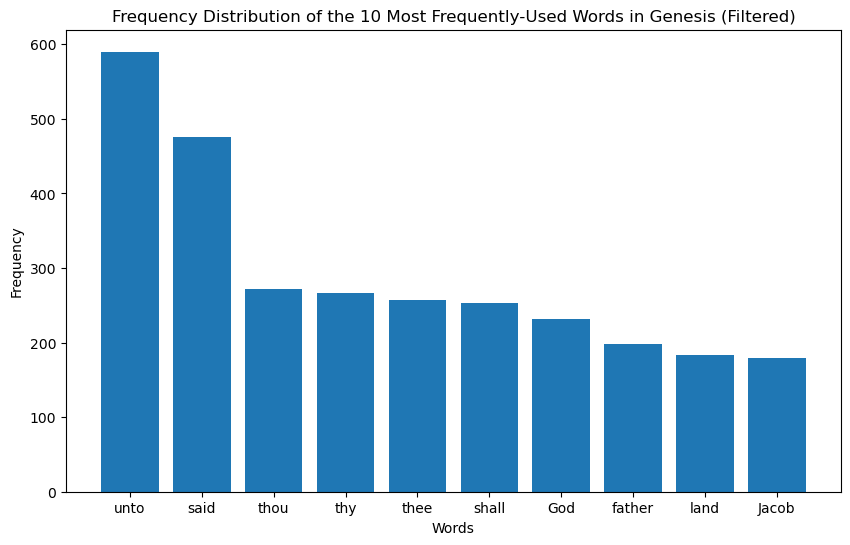

In [4]:
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt


# Step 1: Tokenize the text of Genesis
genesis_tokens = text3.tokens

# Step 2: Create a frequency distribution of the words
fdist_genesis = nltk.FreqDist(genesis_tokens)

# Step 3: Identify and filter out stopwords and punctuation
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

# Combine stopwords and punctuation into a single set
stopwords_and_punctuation = stop_words.union(punctuation)

# Filter out stopwords and punctuation from the frequency distribution
filtered_words = [word for word in genesis_tokens if word.lower() not in stopwords_and_punctuation]

# Create a frequency distribution of the filtered words
fdist_filtered = nltk.FreqDist(filtered_words)

# Step 4: Plot the frequency distribution of the 10 most frequently-used words
most_common_filtered = fdist_filtered.most_common(10)
words, counts = zip(*most_common_filtered)

plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.title('Frequency Distribution of the 10 Most Frequently-Used Words in Genesis (Filtered)')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

### Question 2 (10 points)
Process the book of Genesis by lemmatizing it, removing all stopwords in nltk.corpus.stopwords.words('english'), and only preserving words that are alphanumeric (characters [a-z,A-Z,0-9]). You may use any of the NTLK methods, regex, or other Python string methods to do so. Plot the frequency distribution of the 10 most frequently-used words in this preprocessed version.

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/joseluistejada/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/joseluistejada/nltk_data...


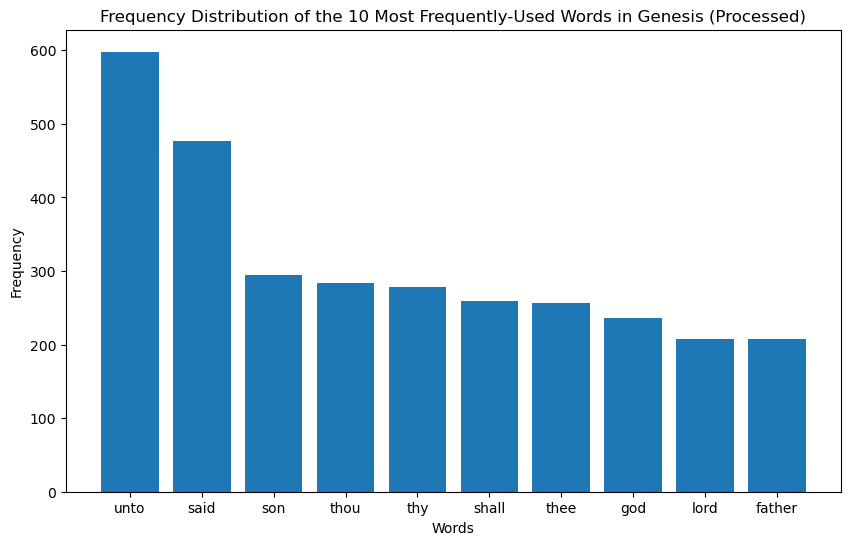

In [6]:
import nltk
from nltk.book import text3
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import matplotlib.pyplot as plt

# Ensure the necessary NLTK data is downloaded
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Process the book of Genesis
processed_words = [
    lemmatizer.lemmatize(word.lower()) 
    for word in text3 
    if word.lower() not in stop_words and word.isalnum()
]

# Create a frequency distribution of the processed words
fdist_processed = nltk.FreqDist(processed_words)

# Plot the frequency distribution of the 10 most frequently-used words
most_common_processed = fdist_processed.most_common(10)
words, counts = zip(*most_common_processed)

plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.title('Frequency Distribution of the 10 Most Frequently-Used Words in Genesis (Processed)')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

### Question 3 (10 points)
Preprocess the Inaugural Address (text4) and Monty Python and the Holy Grail (text6) in the same fashion. Considering all three preprocessed texts as your corpus, generate a vocabulary for the corpus. Which text contains the most unique words (excluding the stopwords)?

In [7]:
import nltk
from nltk.book import text3, text4, text6
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Ensure the necessary NLTK data is downloaded
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to preprocess a text
def preprocess_text(text):
    return [
        lemmatizer.lemmatize(word.lower())
        for word in text
        if word.lower() not in stop_words and word.isalnum()
    ]

# Preprocess the texts
genesis_processed = preprocess_text(text3)
inaugural_processed = preprocess_text(text4)
monty_python_processed = preprocess_text(text6)

# Create a combined corpus
combined_corpus = set(genesis_processed).union(inaugural_processed).union(monty_python_processed)

# Generate vocabularies for each text
genesis_vocab = set(genesis_processed)
inaugural_vocab = set(inaugural_processed)
monty_python_vocab = set(monty_python_processed)

# Determine the text with the most unique words
unique_words_count = {
    'Genesis': len(genesis_vocab),
    'Inaugural Address': len(inaugural_vocab),
    'Monty Python': len(monty_python_vocab)
}

# Find the text with the most unique words
most_unique_words_text = max(unique_words_count, key=unique_words_count.get)

unique_words_count, most_unique_words_text


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/joseluistejada/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/joseluistejada/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


({'Genesis': 2354, 'Inaugural Address': 8096, 'Monty Python': 1614},
 'Inaugural Address')

### Question 4 (10 points)
Using an LSI model reduced to 200 dimensions, which pair of texts (Genesis, Inaugural Address, and Monty Python and the Holy Grail) are most similar? To answer this question, you'll need to first create a bag of words matrix (with or without tf-idf), then use an LSI model to reduce the dimensionality of the matrix to 200 topics. To run the similarity queries, you will need to map each text into the LSI space (see the companion notebooks) before running the query. You should find that each text receives a similarity score of 1.0 when compared to itself.

In [10]:
import nltk
from nltk.book import text3, text4, text6
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim import corpora, models, similarities
import numpy as np

# Ensure the necessary NLTK data is downloaded
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to preprocess a text
def preprocess_text(text):
    return [
        lemmatizer.lemmatize(word.lower())
        for word in text
        if word.lower() not in stop_words and word.isalnum()
    ]

# Preprocess the texts
genesis_processed = preprocess_text(text3)
inaugural_processed = preprocess_text(text4)
monty_python_processed = preprocess_text(text6)

# Combine all texts
all_texts = [genesis_processed, inaugural_processed, monty_python_processed]

# Create a dictionary and a bag of words corpus
dictionary = corpora.Dictionary(all_texts)
corpus = [dictionary.doc2bow(text) for text in all_texts]

# Apply TF-IDF
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

# Create LSI model
lsi = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=200)
corpus_lsi = lsi[corpus_tfidf]

# Compute similarities
index = similarities.MatrixSimilarity(corpus_lsi)

# Calculate similarity scores
sims = index[corpus_lsi]

# Find the most similar pair
similarity_matrix = np.array(sims)
np.fill_diagonal(similarity_matrix, 0)  # Exclude self-similarity
most_similar_pair = np.unravel_index(np.argmax(similarity_matrix), similarity_matrix.shape)

similarity_matrix, most_similar_pair


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/joseluistejada/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/joseluistejada/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


(array([[0.        , 0.01812242, 0.00240713],
        [0.01812242, 0.        , 0.00565728],
        [0.00240713, 0.00565728, 0.        ]], dtype=float32),
 (0, 1))